In [54]:
import mysql.connector
import pandas as pd
import numpy as np
import random
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import cm

In [67]:
cnx = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="root",
    database="Test"
   
)
cursor = cnx.cursor()

              銷售金額
月份                
1996-07   30188.40
1996-08   26606.70
1996-09   27634.60
1996-10   41198.80
1996-11   49701.10
1996-12   50947.40
1997-01   66687.25
1997-02   41201.65
1997-03   39976.25
1997-04   55695.24
1997-05   56818.65
1997-06   39083.80
1997-07   55459.93
1997-08   49976.84
1997-09   59727.22
1997-10   70322.30
1997-11   45909.06
1997-12   77467.76
1998-01  100849.32
1998-02  104556.80
1998-03  109864.00
1998-04  134621.06
1998-05   19894.92


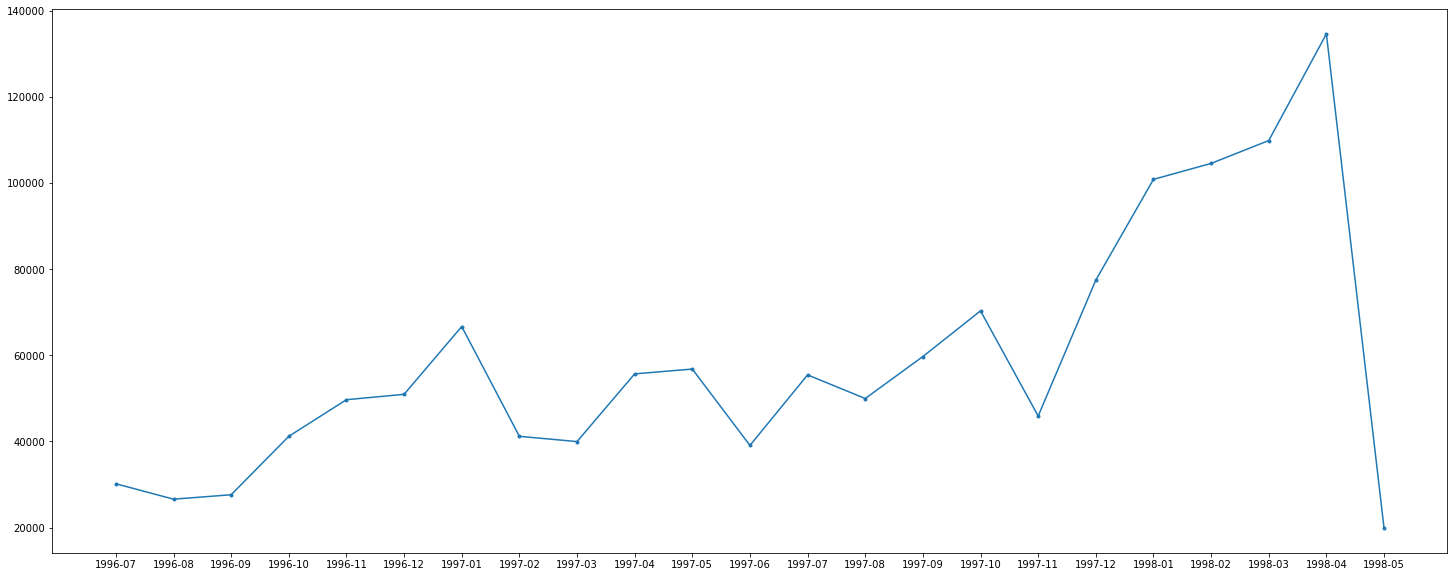

In [42]:
#CHART 1 各年每月份的銷售總金額
select_data_query = """
SELECT DATE_FORMAT(o.订购日期, '%Y-%m') AS 月份, ROUND(SUM(od.数量*od.单价-od.折扣),2) AS 銷售金額 FROM `Order`o 
JOIN `Order_Detail` od ON (o.订单ID = od.订单ID)
GROUP BY DATE_FORMAT(订购日期, '%Y-%m')
"""
cursor.execute(selec_data_query)
result = cursor.fetchall()
df1 = pd.DataFrame(result, columns=[i[0] for i in cursor.description]).set_index('月份')
#print(df1)

fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(df1['銷售金額'],marker='.',label="銷售金額")
plt.show()

/Users/ritachung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ritachung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ritachung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ritachung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0, flags=flags)


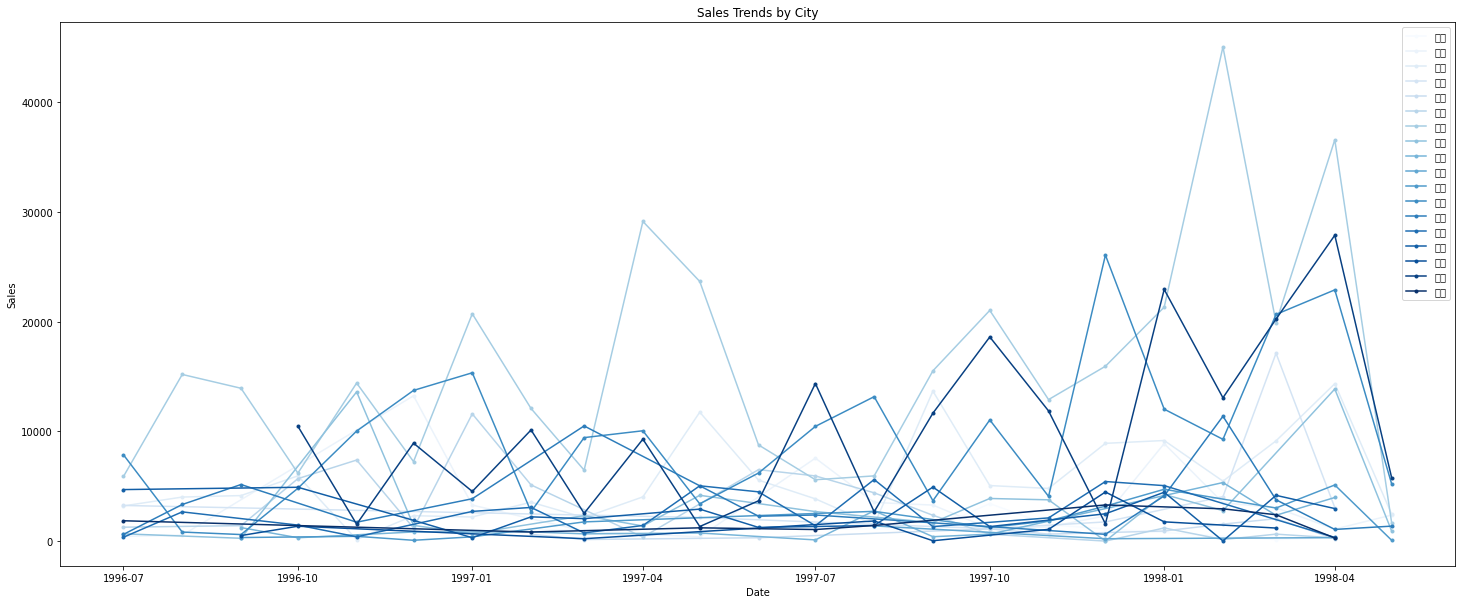

In [50]:
#CHART 2 統計各年的各城市銷售總金額
select_data_query = """
SELECT DATE_FORMAT(o.订购日期, '%Y-%m') AS 月份, c.城市, ROUND(SUM(od.数量*od.单价-od.折扣),2) AS 銷售金額 FROM `Order`o 
JOIN `Order_Detail` od ON (o.订单ID = od.订单ID)
JOIN `Client` c ON (o.客户ID=c.客户ID)
GROUP BY DATE_FORMAT(订购日期, '%Y-%m'), c.城市
ORDER BY 月份, 銷售金額 DESC
"""
cursor.execute(select_data_query)
result = cursor.fetchall()
df2 = pd.DataFrame(result, columns=[i[0] for i in cursor.description])
#print(df2)
df2['月份'] = pd.to_datetime(df2['月份'])

colors = cm.Blues(np.linspace(0, 1, len(grouped)))
fig, ax = plt.subplots(figsize=(25, 10))
grouped = df2.groupby('城市')
for i, (name, group) in enumerate(grouped):
    ax.plot(group['月份'], group['銷售金額'], label='城市',marker='.',color=colors[i])
    
ax.set_title('Sales Trends by City')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
plt.show()



Text(0, 0.5, 'Total Sales Over Year')

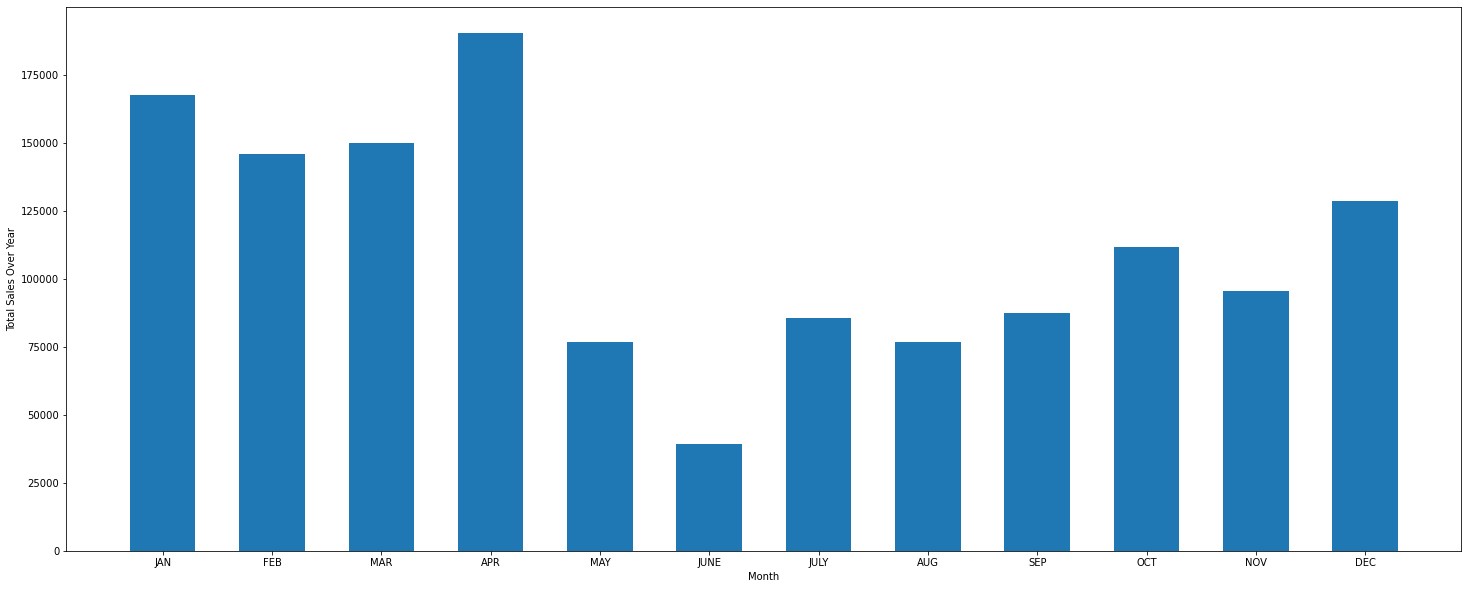

In [65]:
#CHART 3 統計同月份的銷售總金額
select_data_query = """
SELECT MONTH(o.订购日期) AS 月份, ROUND(SUM(od.数量*od.单价-od.折扣),2) AS 銷售金額 FROM `Order`o 
JOIN `Order_Detail` od ON (o.订单ID = od.订单ID)
GROUP BY MONTH(o.订购日期)
"""
cursor.execute(select_data_query)
result = cursor.fetchall()
df3 = pd.DataFrame(result, columns=[i[0] for i in cursor.description])
df3['月份']=np.array(['JAN', 'FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC'])
#print(df3)

fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(df3['月份'],df3['銷售金額'],width=0.6)
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales Over Year')

In [69]:
#Input SQL Query
#SELECT p.产品ID, p.产品名称, (p.订购量-p.库存量-p.再订购量) AS 庫存不足數 FROM `Product` p
#WHERE (p.订购量-p.库存量-p.再订购量)>0
select_data_query = input("""Input your SQL query.
""")
try:
    cursor.execute(select_data_query)
    result = cursor.fetchall()
except mysql.connector.errors.DataError as e:
    print(f"Error: {e}")
else :
    df5 = pd.DataFrame(result, columns=[i[0] for i in cursor.description])
    print(df5)

Input your SQL query.
 SELECT p.产品ID, p.产品名称, (p.订购量-p.库存量-p.再订购量) AS 庫存不足數 FROM `Product` p WHERE (p.订购量-p.库存量-p.再订购量)>0


    产品ID  产品名称  庫存不足數
0      3   蕃茄酱     32
1     21    花生     32
2     31  温馨奶酪     50
3     32   白奶酪      6
4     37    干贝     14
5     45    雪鱼     50
6     48   玉米片     30
7     49    薯条     35
8     64    黄豆     28
9     66    肉松     76
10    74    鸡精     11


In [ ]:
# Close Connect
cursor.close()
cnx.close()